##                                                    Regresión Lineal

En este ejemplo vamos a implementar una regresión lineal con una variable para predecir los beneficios de una cadena de restaurantes. Supón que eres el CEO de una franquiicia y estás considerando diferentes ciudades para abrir un nuevo punto de venta. La cadena ya tiene distintos locales en distintas ciudades y disponemos de información sobre los beneficios y población de cada ciudad. El objetivo es usar esta información para ayudarnos a tomar la decisión sobre en que ciudad debemos expandir el negocio.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

#### Hipótesis
#### $$ h=X\theta$$
#### Función de coste
#### $$ J(\theta)=\dfrac{1}{2m}(h-y)^{T}(h-y) $$
#### Gradiente
#### $$\nabla J(\theta)= \dfrac{1}{m}X^{T}(h-y)$$

In [2]:
def hipotesis(X, theta):
    return(X.dot(theta))
def computeCost(X, y, theta):
    m = y.size    
    h = hipotesis(X, theta)    
    J = 1/(2*m)*np.sum(np.square(h-y))
    return(J)
def grad(X, y, theta):
    m = y.size
    h = hipotesis(X, theta)
    return (1/m)*(X.T.dot(h-y))

Función con el algoritmo "Gradiente descendiente", dado $X, y, \alpha, \theta$ y número de iteraciones. <p>

Por defecto, toma el radio de aprendizaje 0.01 y el número de iteraciones 1500.

Además, en el vector J_history guardamos el valor del coste en cada iteración, ésto nos permitirá evaluar la convergencia.

In [3]:
def gradientDescent(X, y, theta, alpha=0.01, num_iters=1500):
    J_history = np.zeros(num_iters)   
    for iter in np.arange(num_iters):
        theta = theta - alpha*grad(X, y, theta)
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

Importo los datos de la base de datos "data1.txt", la cual se puede encontrar en este repositorio. <p>
Observo la relación entre los beneficios y la población en un plot.


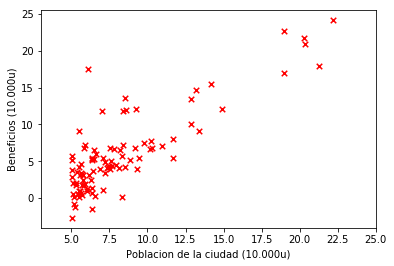

In [4]:
data = np.loadtxt('data/beneficios.txt', delimiter=',')
X = np.c_[np.ones(len(data)), data[:,0]]
y = np.c_[data[:,1]]

plt.scatter(X[:,1], y, s=30, c='r', marker='x')
plt.xlabel('Poblacion de la ciudad (10.000u)')
plt.ylabel('Beneficios (10.000u)')
plt.xlim(3,25)
plt.show()

Calculo el coste inicial para un $\theta=[0,0]$, posteriormente aplico el algoritmo del gradiente descendiente obteniendo el nuevo valor para $\theta$ y el coste mínimo.<p>
Realizo una gráfica con el valor del coste en función del número de iteraciones para asegurar la convergencia.

theta inicial: [0 0]
coste inicial 32.0727338775
theta:  [-3.63029144  1.16636235]
coste final 4.48338825659


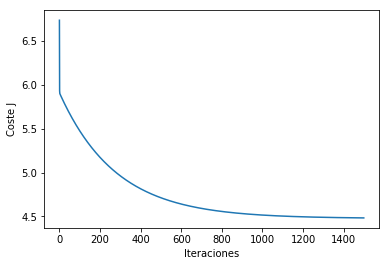

In [5]:
initial_theta = np.array([[0],[0]])
print('theta inicial:', initial_theta.ravel())
cost0 = computeCost(X, y, initial_theta)
print('coste inicial', cost0)
theta , Cost_J = gradientDescent(X, y, initial_theta)
print('theta: ', theta.ravel())
costF = computeCost(X, y, theta)
print('coste final', costF)
plt.plot(Cost_J)
plt.ylabel('Coste J')
plt.xlabel('Iteraciones')
plt.show()


Aplicamos la regresión lineal con scikit-learn y comparamos las rectas en el mismo plot.

No es recomendable utilizar mi implementación para problemas a gran escala.

Las implementaciones que existen en Python (scikit-learn), están infinitamente mejor optimizadas y han sido realizadas por expertos.

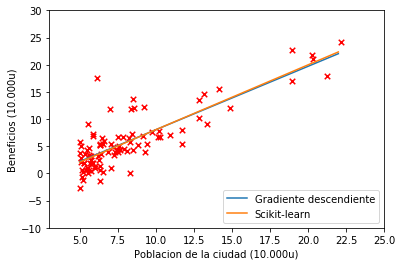

In [6]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx
plt.scatter(X[:,1], y, s=30, c='r', marker='x')
plt.plot(xx,yy, label='Gradiente descendiente')
# Comparo con scikit-learn
regr = LinearRegression(fit_intercept=False)
regr.fit(X, y.ravel())
regr.coef_[0]
plt.plot(xx, regr.coef_[0]+regr.coef_[1]*xx, label='Scikit-learn')
plt.xlim(3,25)
plt.ylim(-10,30)
plt.xlabel('Poblacion de la ciudad (10.000u)')
plt.ylabel('Beneficios (10.000u)')
plt.legend(loc=4)
plt.show()

Una vez obtenido nuestro modelo, podemos predecir los beneficios en función del número de habitantes.<p>
Suponemos que el número de habitantes de las dos ciudades en las cuales nos planteamos poner un negocio tienen como población:<p>
80000 y 180000 habitantes

Los beneficios de una ciudad de 80000 habitantes serán aproximadamente   57006.07
Los beneficios de una ciudad de 180000 habitantes serán aproximadamente  175788.25


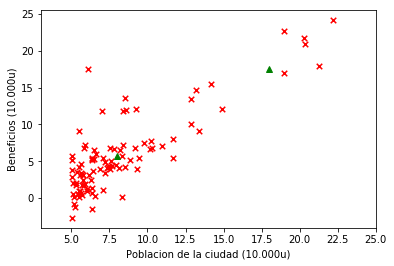

In [7]:
# Predecir los beneficios de una ciudad de 80000 habitantes 
# con el modelo que utiliza el gradiente descendiente
p1 = (theta.T.dot([1,8])*10000)[0]
print('Los beneficios de una ciudad de 80000 habitantes' + \
      ' serán aproximadamente  ', round(p1,2))
# Predecir los beneficios de una ciudad de 180000 habitantes 
# con Scikit-learn
p2 = regr.coef_.T.dot([1,18])*10000
print('Los beneficios de una ciudad de 180000 habitantes' + \
      ' serán aproximadamente ', round(p2,2))
plt.scatter(X[:,1], y, s=30, c='r', marker='x')
plt.plot([[8, 18]], [[p1/10000, p2/10000]], 'g^')
plt.xlabel('Poblacion de la ciudad (10.000u)')
plt.ylabel('Beneficios (10.000u)')
plt.xlim(3,25)
plt.show()

Ahora nos disponemos a dibujar las curvas de nivel y el contorno de la función de coste en función de los parámetros.<p>
Nuestra función de coste depende de $\theta_{0} ,\theta_{1}$ y por lo tanto es interesante apreciar gráficamente los resultados. En el caso de ser más de dos variables nuestra función de coste también sería convexa, pero la dificultad de apreciarlo visualmente aumentaría.

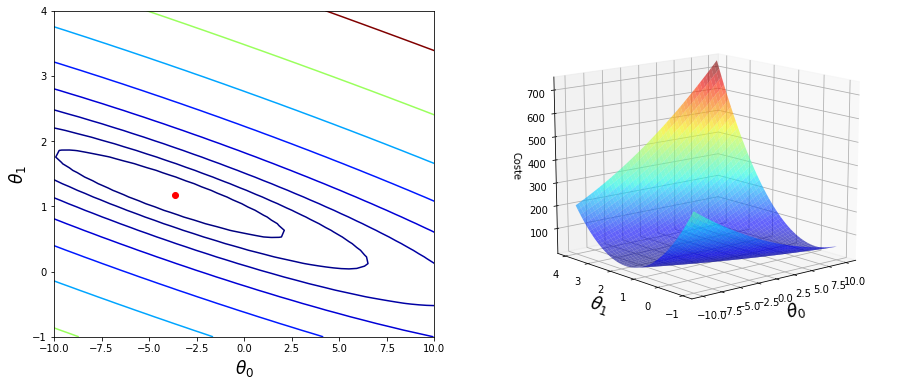

In [8]:
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')
# Dibujo de la izquierda
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')
# Dibujo de la derecha
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, 
                 cmap=plt.cm.jet)
ax2.set_zlabel('Coste')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)
plt.show()

Este ejemplo es con dos variables para poder apreciar visualmente los resultados, la teoría explicada en este capítulo se extiende a $\textbf{n}$ variables.